# Data gathering

## Imports

In [1]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from matplotlib.ticker import FormatStrFormatter

params = {'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

unfiltered_data = pd.read_table('final_data_updated.csv', delimiter=',')

## Remove corrupted or invalid data

In [2]:
invalid_value_mask = np.equal(unfiltered_data, -1)
invalid_rows_mask = np.any(invalid_value_mask, axis=1)
data = unfiltered_data[~invalid_rows_mask]

## Specific projects

In [3]:
data = data.loc[data['Project'].isin(['Math', 'Time', 'Lang', 'Closure', 'Chart'])]
print(data['Project'].unique())

['Chart' 'Closure' 'Lang' 'Math' 'Time']


In [4]:
# Change here to set another label: L-1, L-3, L-4, L-5, L-5-10, L-10
label = 'L-10'

# Overview

## Dataset

In [5]:
print(data.shape)

(333, 70)


In [8]:
data.filter(like='T-').head()

,T-#T,T-#PT,T-#FT,T-%PT,T-%FT,T-#E,T-#VE,T-#NVE,T-#V,T-Spa,T-Cov,T-CovPT,T-CovFT,T-AvgVE,T-AvgVEPT,T-AvgVEFT,T-#VEP^FT,T-%VEP^FT
0,427,426,1,0.9977,0.0023,1246,842,404,39256,0.0738,0.6758,0.6758,0.0803,91.9344,91.9155,100.0000,100,0.1188
1,350,348,2,0.9943,0.0057,206,128,78,5557,0.0771,0.6214,0.4903,0.2573,15.8771,15.7213,43.0000,26,0.2031
2,50,49,1,0.9800,0.0200,183,120,63,1887,0.2062,0.6557,0.6557,0.2077,37.7400,37.7347,38.0000,38,0.3167
3,127,126,1,0.9921,0.0079,69,49,20,2220,0.2533,0.7101,0.7101,0.1884,17.4803,17.5159,13.0000,13,0.2653
4,480,477,3,0.9938,0.0063,75,45,30,5218,0.1449,0.6000,0.5867,0.2800,10.8708,10.8281,17.6667,20,0.4444


<IPython.core.display.Javascript object>


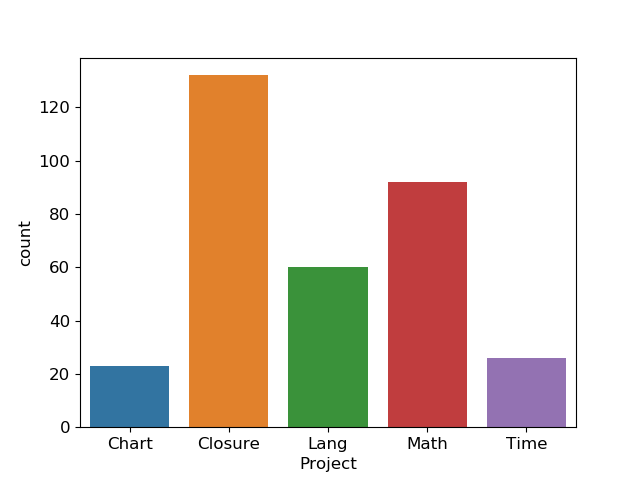

Shape: (333, 70)


In [9]:
sns.countplot(data['Project'], label='Count');
print("Shape: " + str(data.shape))

## Labels

<IPython.core.display.Javascript object>


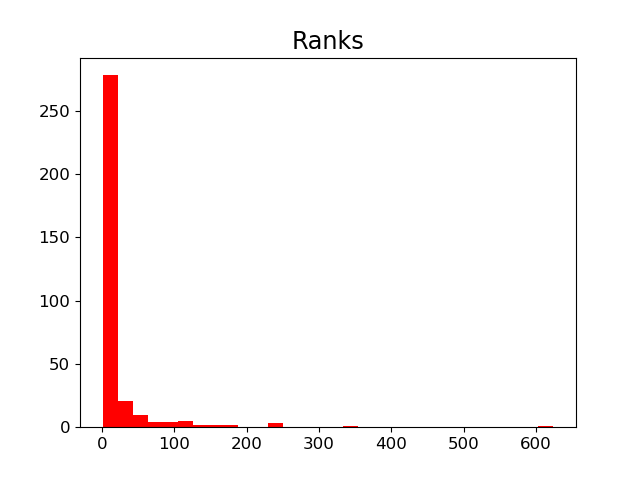

In [10]:
ranks = data.get('L-Rank')
plt.hist(ranks, bins=30, color='red')
plt.title("Ranks");

<IPython.core.display.Javascript object>


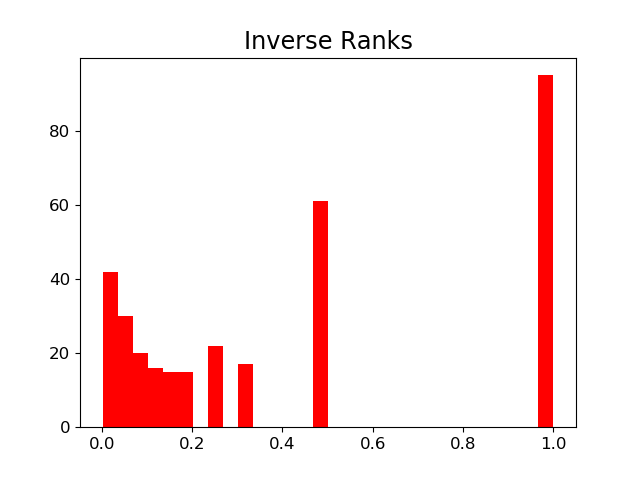

In [11]:
in_ranks = data.get('L-Inverse')
plt.hist(in_ranks, bins=30, color='red')
plt.title("Inverse Ranks");

<IPython.core.display.Javascript object>


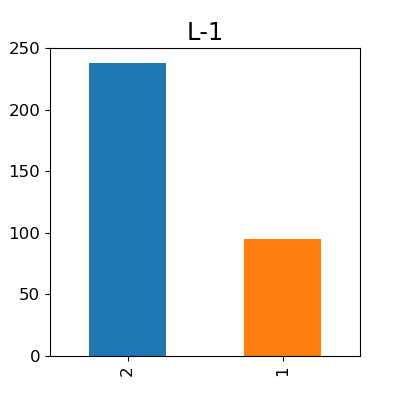

In [10]:
pd.value_counts(data['L-1']).plot(kind='bar', figsize=(4,4), subplots=True);

<IPython.core.display.Javascript object>


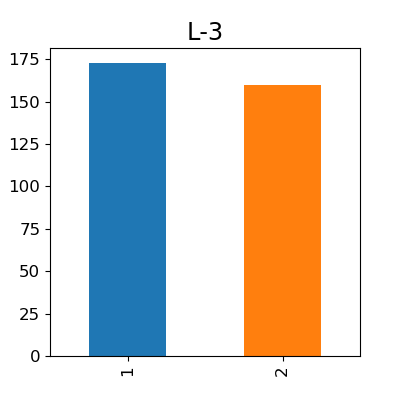

In [9]:
pd.value_counts(data['L-3']).plot(kind='bar', figsize=(4,4), subplots=True);

<IPython.core.display.Javascript object>


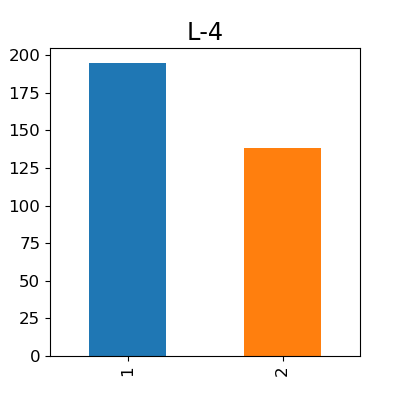

In [11]:
pd.value_counts(data['L-4']).plot(kind='bar', figsize=(4,4), subplots=True);

<IPython.core.display.Javascript object>


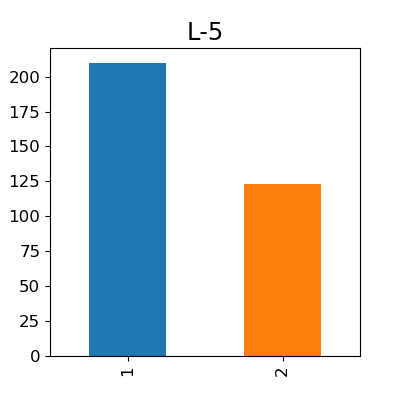

In [12]:
pd.value_counts(data['L-5']).plot(kind='bar', figsize=(4,4), subplots=True);

<IPython.core.display.Javascript object>


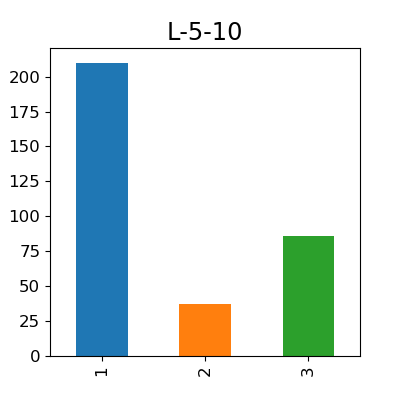

In [16]:
pd.value_counts(data['L-5-10'])[[1,2,3]].plot(kind='bar', figsize=(4,4), subplots=True);

<IPython.core.display.Javascript object>


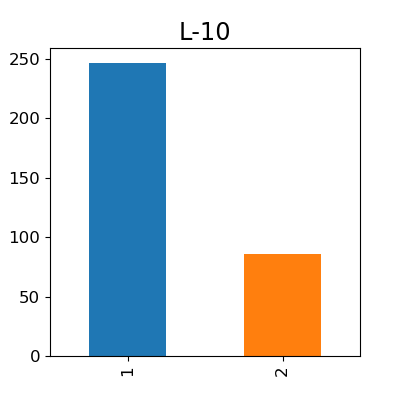

In [17]:
pd.value_counts(data['L-10']).plot(kind='bar', figsize=(4,4), subplots=True);

# Plotting functions

In [12]:
# Change here to set another label: L-1, L-3, L-4, L-5, L-5-10, L-10
label = 'L-10'

columns = 3

def plot_boxes(features):
    size = features.shape[1]
    rows = np.ceil(size/columns)
    fig = plt.figure()
    fig.set_figheight(4*rows)
    fig.set_figwidth(16)
    for i in range(1,size+1):
        column_name = features.dtypes.index[i-1]
        ax = fig.add_subplot(rows,columns,i)
        ax.boxplot(features[column_name])
        ax.set_title(column_name)
        #ax.title.set_size(titlesize)
    plt.tight_layout()
    plt.show()
    
def plot_hists(features):
    size = features.shape[1] + 1
    rows = np.ceil(size/columns)
    fig = plt.figure()
    fig.set_figheight(4*rows)
    fig.set_figwidth(16)
    for i in range(1,size):
        column_name = features.dtypes.index[i-1]
        ax = fig.add_subplot(rows,columns,i)
        ax.hist(features[column_name], bins=30)
        ax.set_title(column_name)
        #ax.title.set_size(titlesize)
    ax = fig.add_subplot(rows,columns,size)
    ax.hist(ranks, color='r', bins=30)
    ax.set_title("Ranks")
    #ax.title.set_size(titlesize)
    plt.tight_layout()
    plt.show()
    
def plot_hists_groups(features):
    row_size = features.shape[1]
    label_quantity = pd.value_counts(data[label])
    columns = np.sort(data[label].unique())
    column_size = len(columns)
    fig = plt.figure()
    size = row_size * column_size
    fig.set_figheight(4*row_size)
    fig.set_figwidth(4*column_size)
    for i in range(0, row_size):
        column_name = features.dtypes.index[i]
        axRow = None
        for j in range(0, column_size):
            if axRow:
                ax = fig.add_subplot(row_size, column_size,(i*column_size)+j+1, sharex=axRow, sharey=axRow)
            else:
                ax = fig.add_subplot(row_size, column_size,(i*column_size)+j+1)
            feature_vector = features[column_name]
            feature_vector = feature_vector.loc[data[label] == columns[j]]
            weights = np.ones_like(feature_vector)/float(label_quantity[columns[j]])
            ax.hist(feature_vector, bins=20, weights=weights)
            ax.set_title(column_name + "::" + str(columns[j]))
            #ax.title.set_size(titlesize)
            axRow = ax
    plt.tight_layout()
    plt.show()
    
def cor_scatter(X,y,size):
    cmap = plt.get_cmap('gnuplot')
    scatter = pd.plotting.scatter_matrix(X, 
                                     c = y, 
                                     marker = '.',
                                     s=40, 
                                     hist_kwds={'bins':15}, 
                                     figsize=(size,size), 
                                     cmap = cmap)
    corr = X.corr().values
    for i, j in zip(*plt.np.triu_indices_from(scatter, k=1)):
        scatter[i,j].annotate("%.3f" %corr[i,j], (0.5, 0.9), xycoords='axes fraction', ha='center', va='baseline', size=15, color='r')
        
    for i, j in zip(*plt.np.tril_indices_from(scatter, k=1)):
        vals = scatter[i,j].get_yticks()
        scatter[i,j].set_yticklabels(["{:.2f}".format(x).rstrip('0').rstrip('.') for x in vals])

# Static Metrics

## Box Plots

<IPython.core.display.Javascript object>


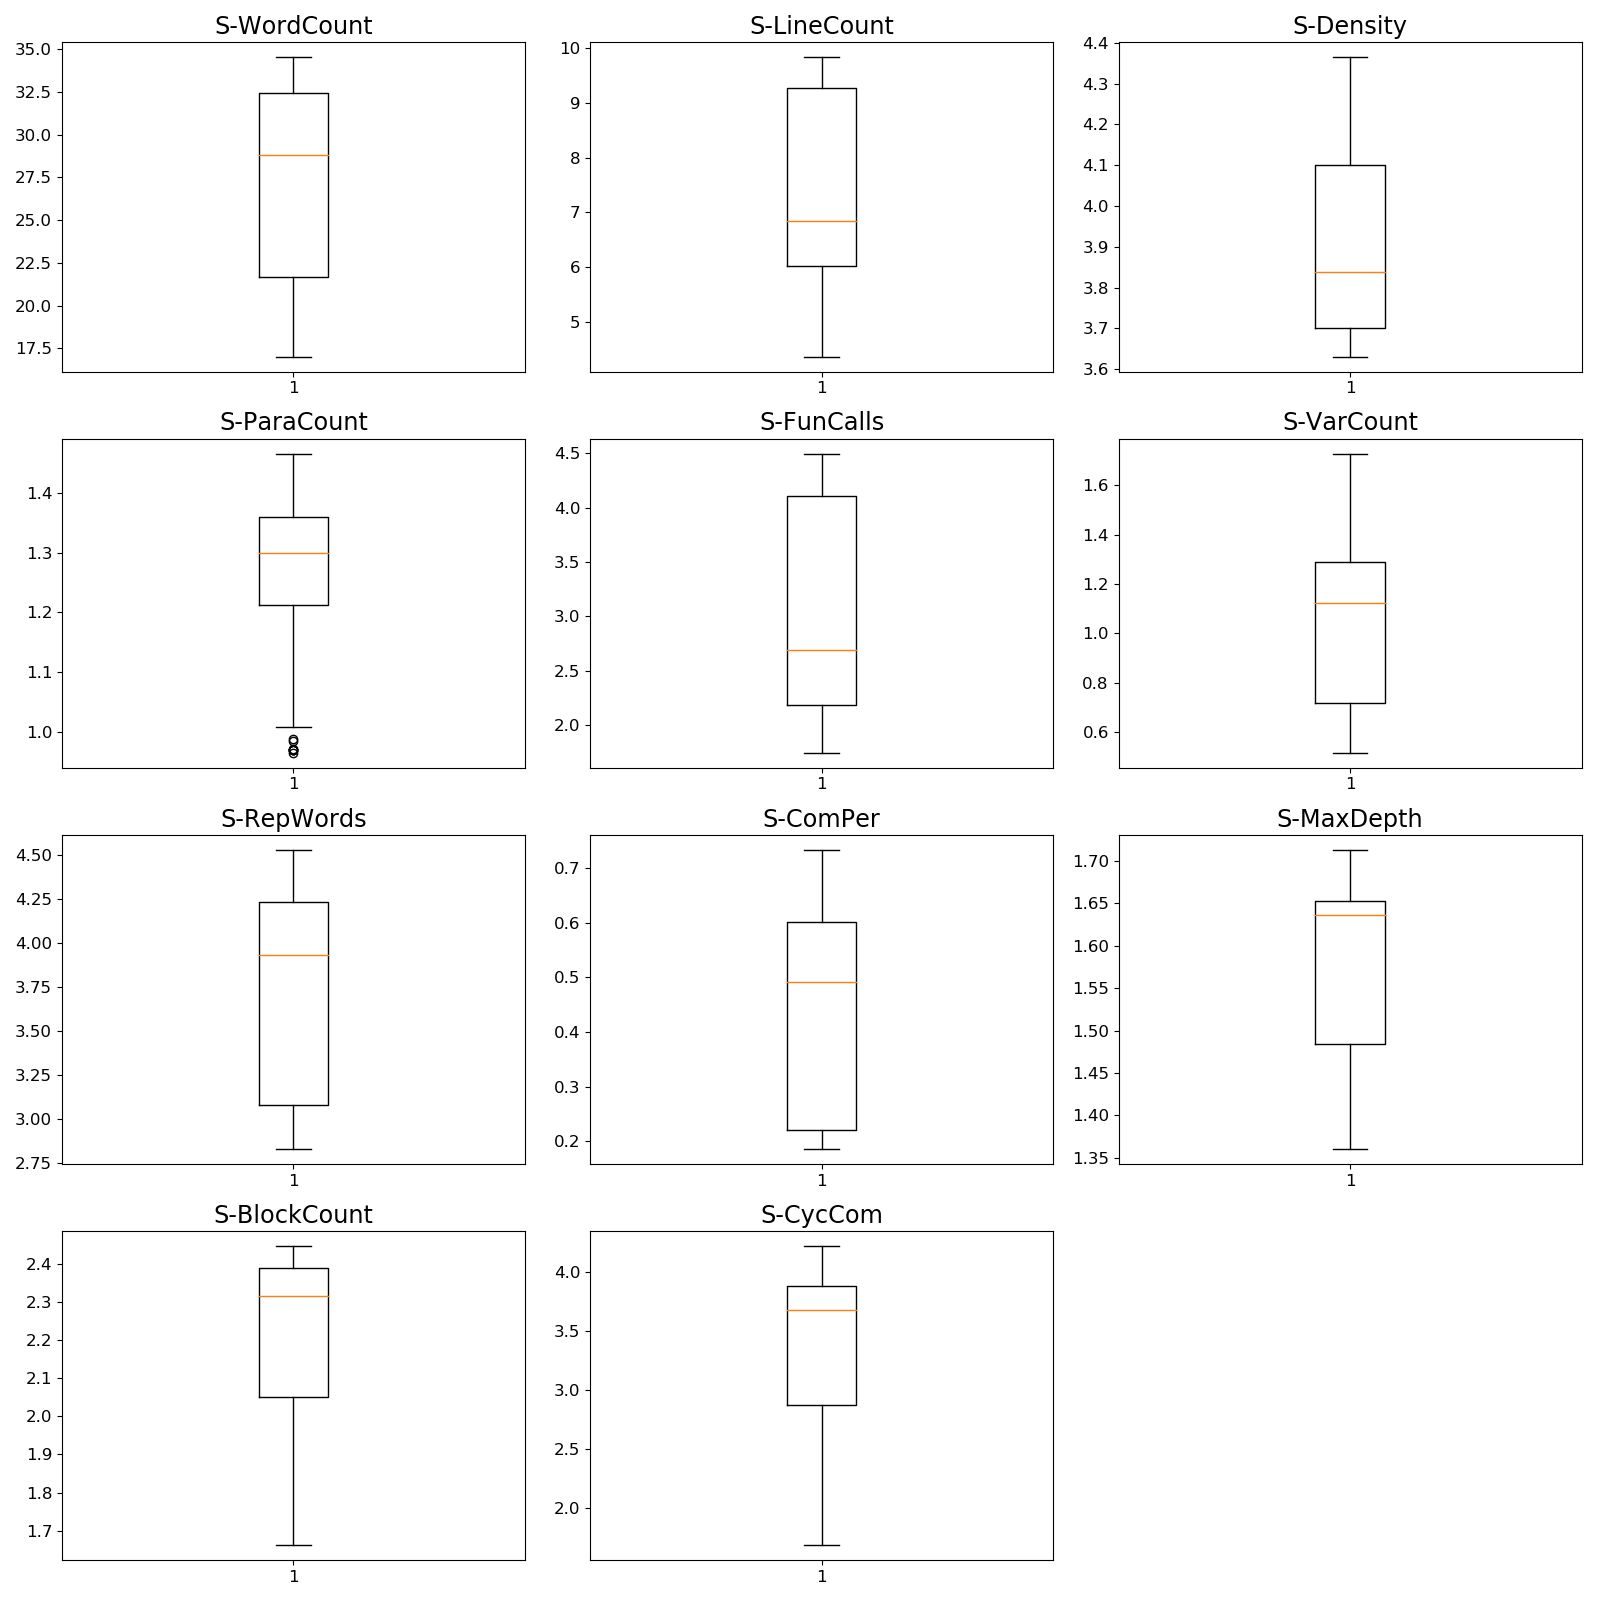

In [41]:
plot_boxes(data.filter(like='S-'));

## Histograms (normalized)

<IPython.core.display.Javascript object>


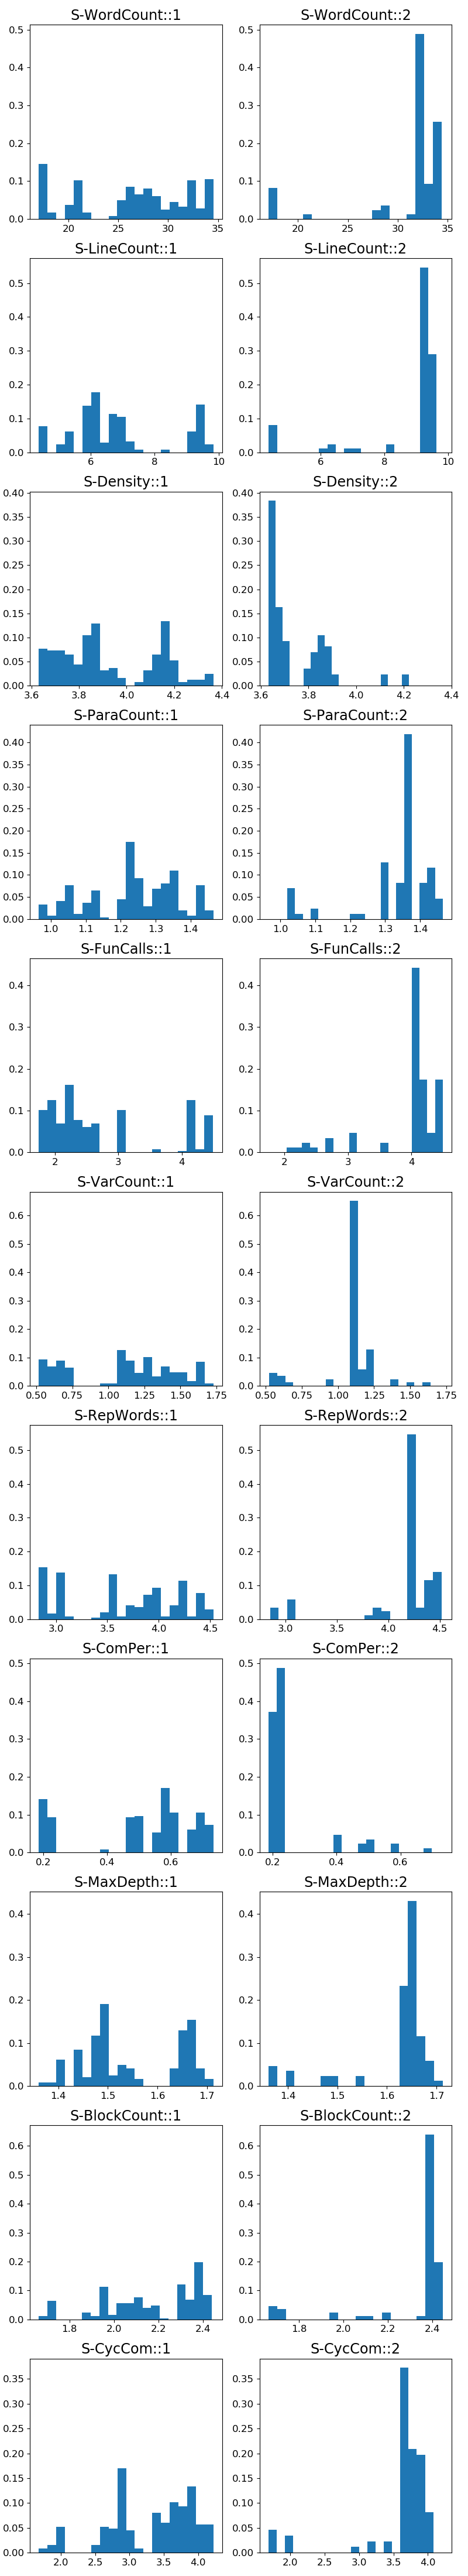

In [42]:
plot_hists_groups(data.filter(like='S-'))

# Dynamic metrics

## Box Plots

<IPython.core.display.Javascript object>


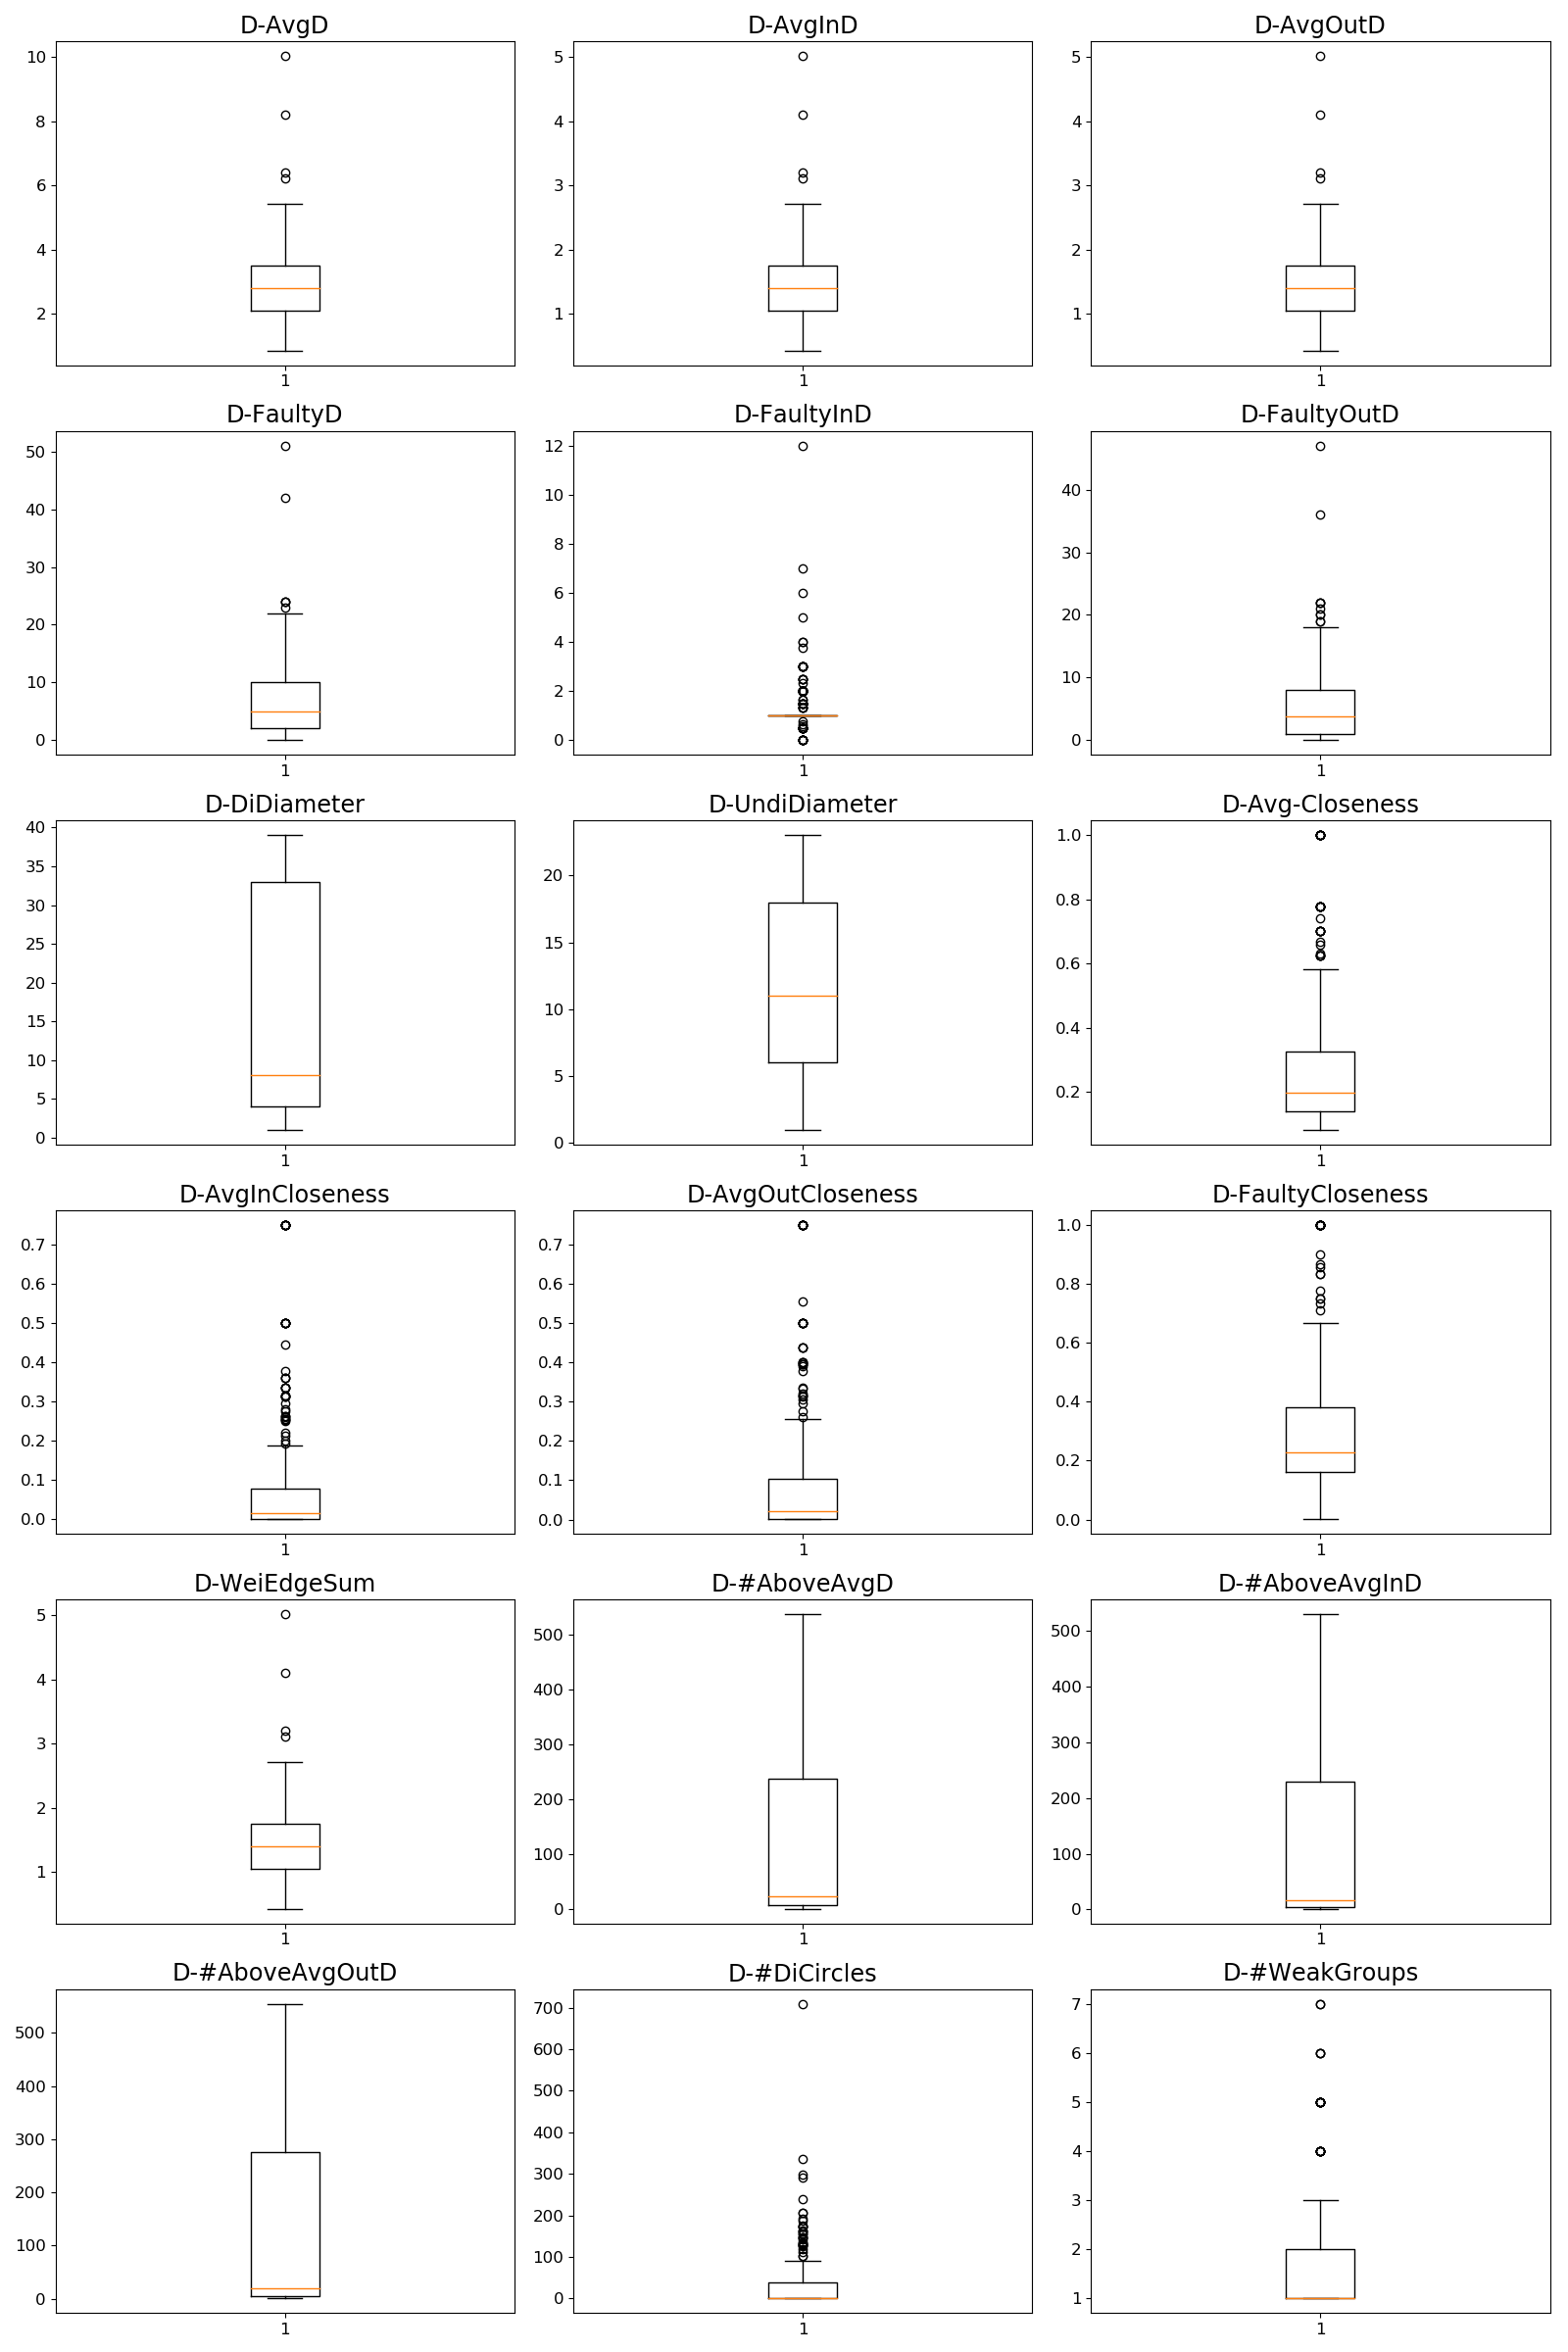

In [13]:
plot_boxes(data.filter(like='D-'))

## Histograms (normalized)

<IPython.core.display.Javascript object>


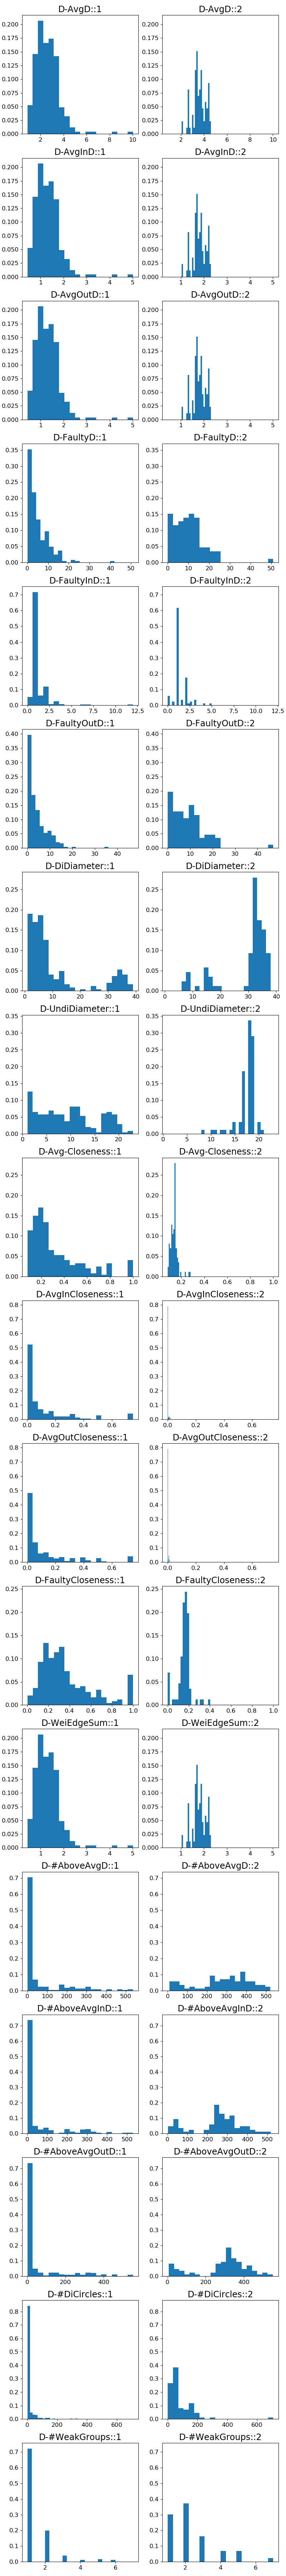

In [14]:
plot_hists_groups(data.filter(like='D-'))

# Test Metrics

## Box Plots

<IPython.core.display.Javascript object>


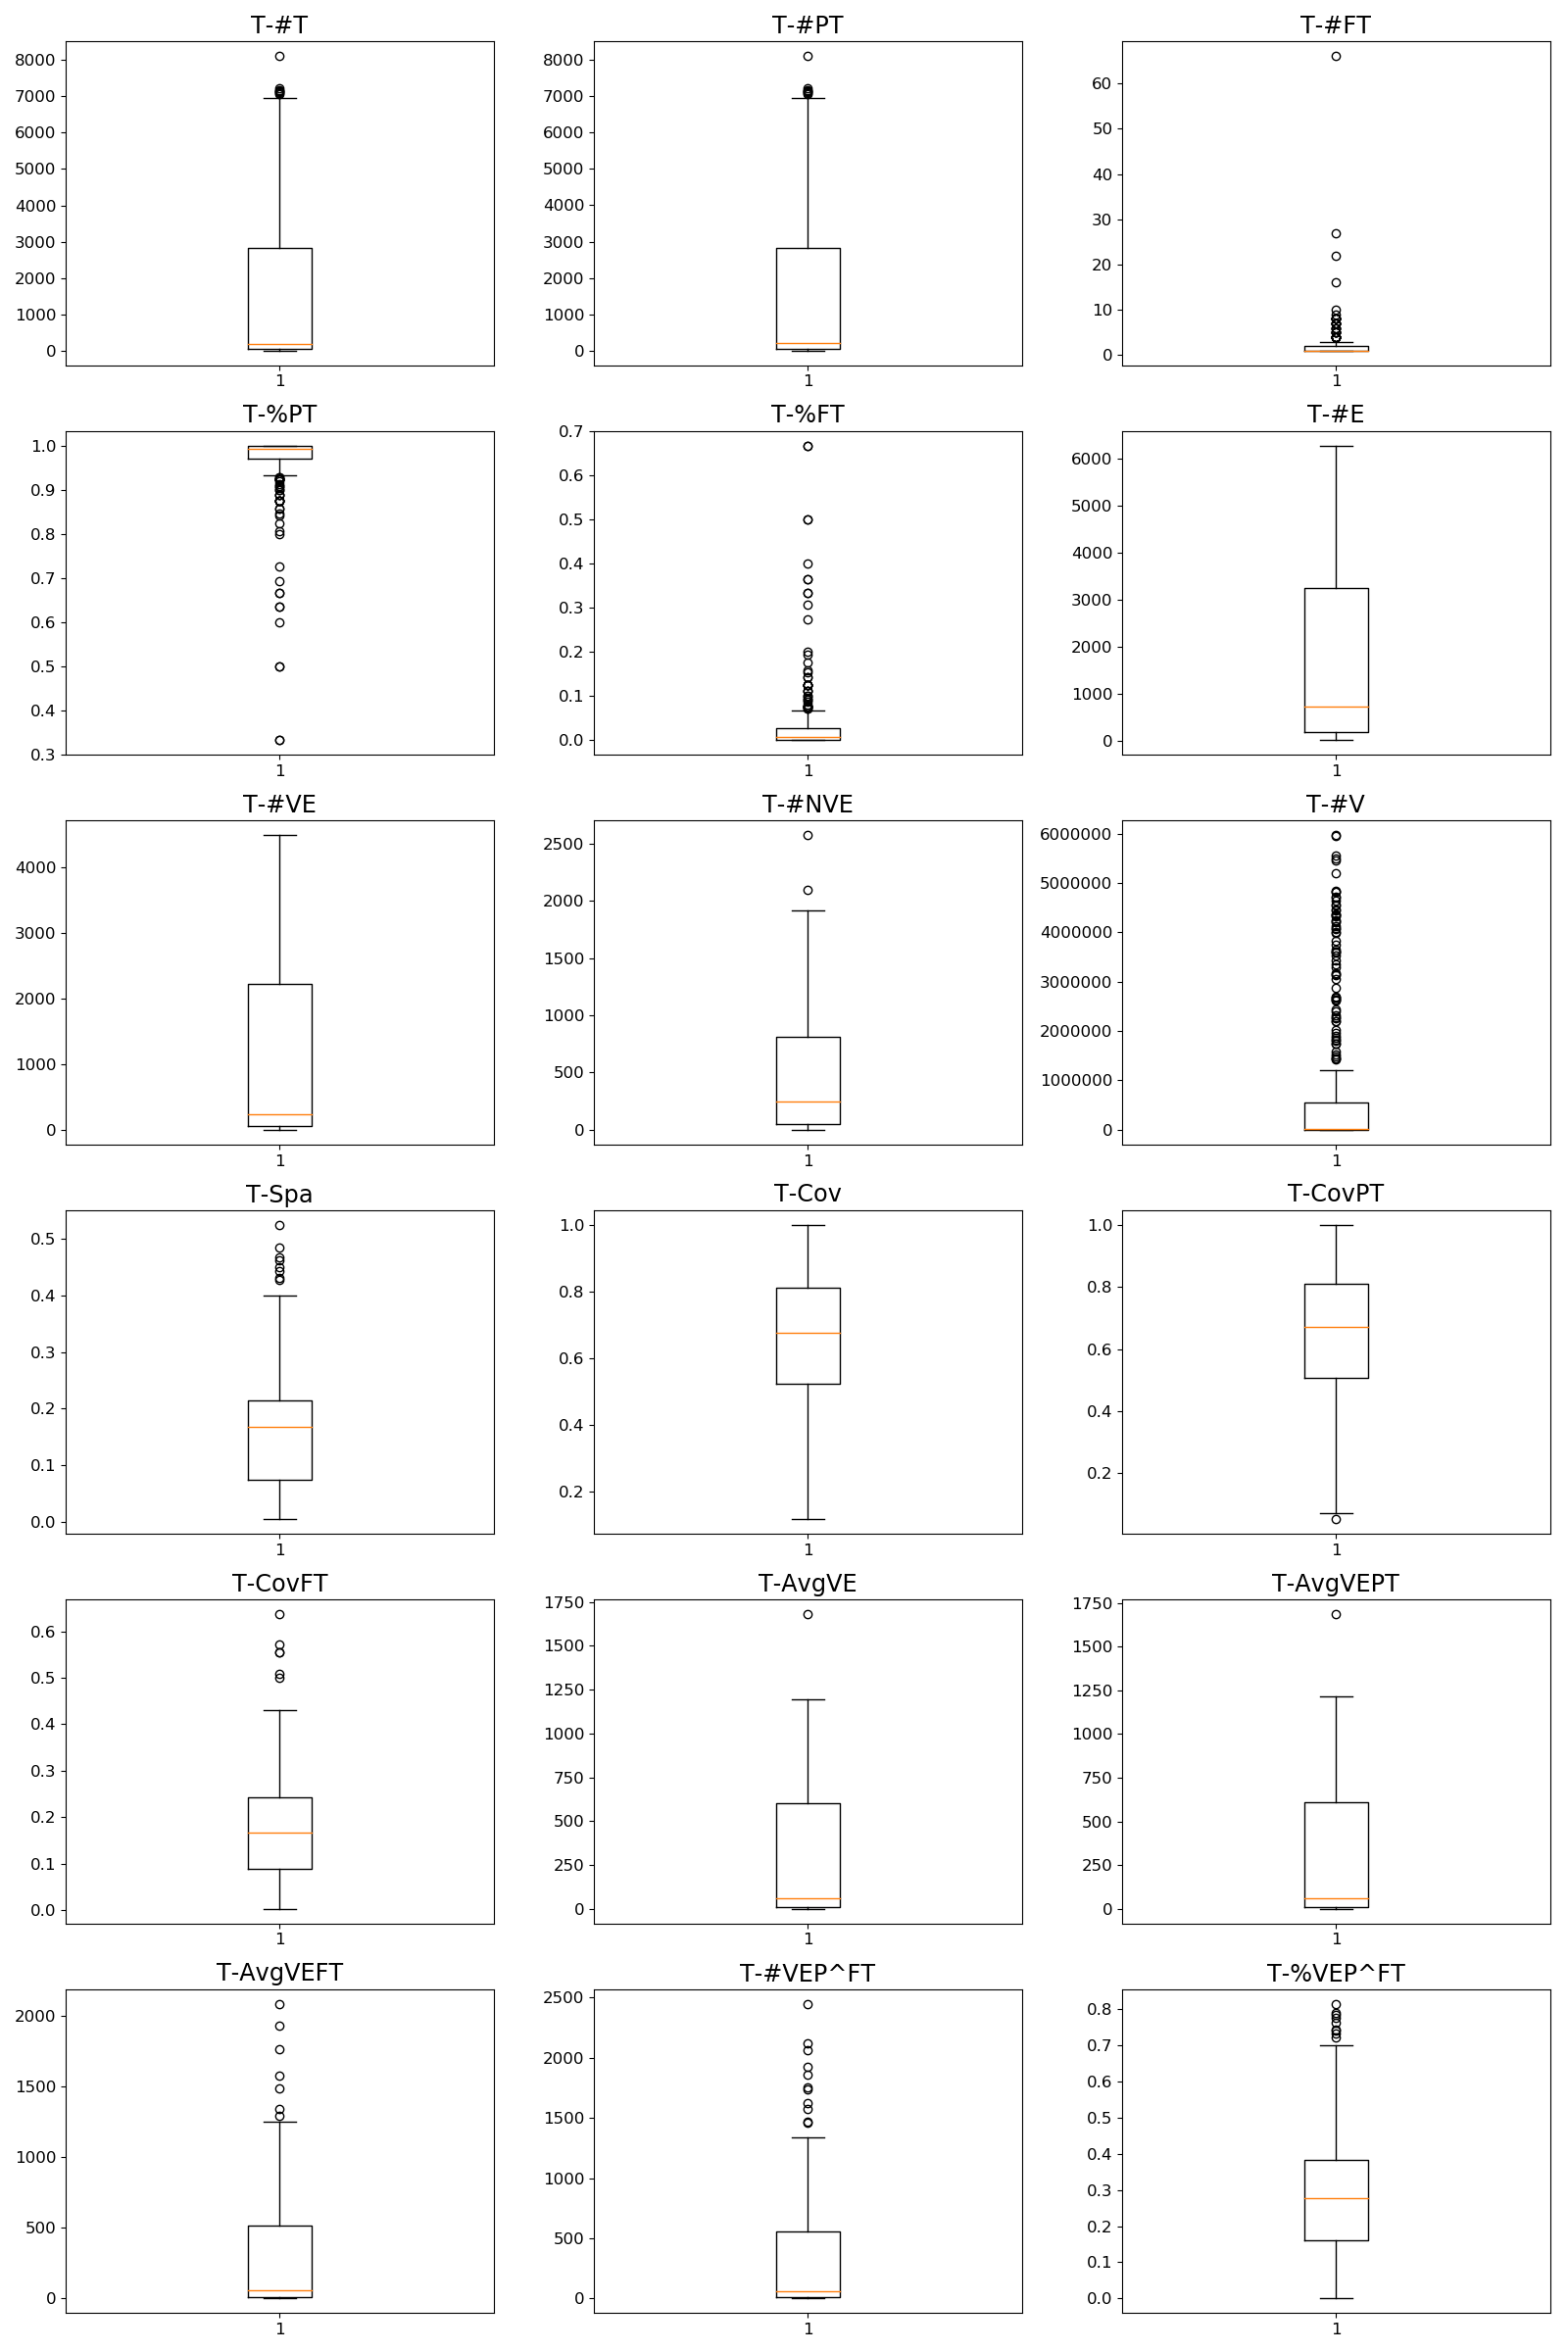

In [51]:
plot_boxes(data.filter(like='T-'))

## Histograms (normalized)

<IPython.core.display.Javascript object>


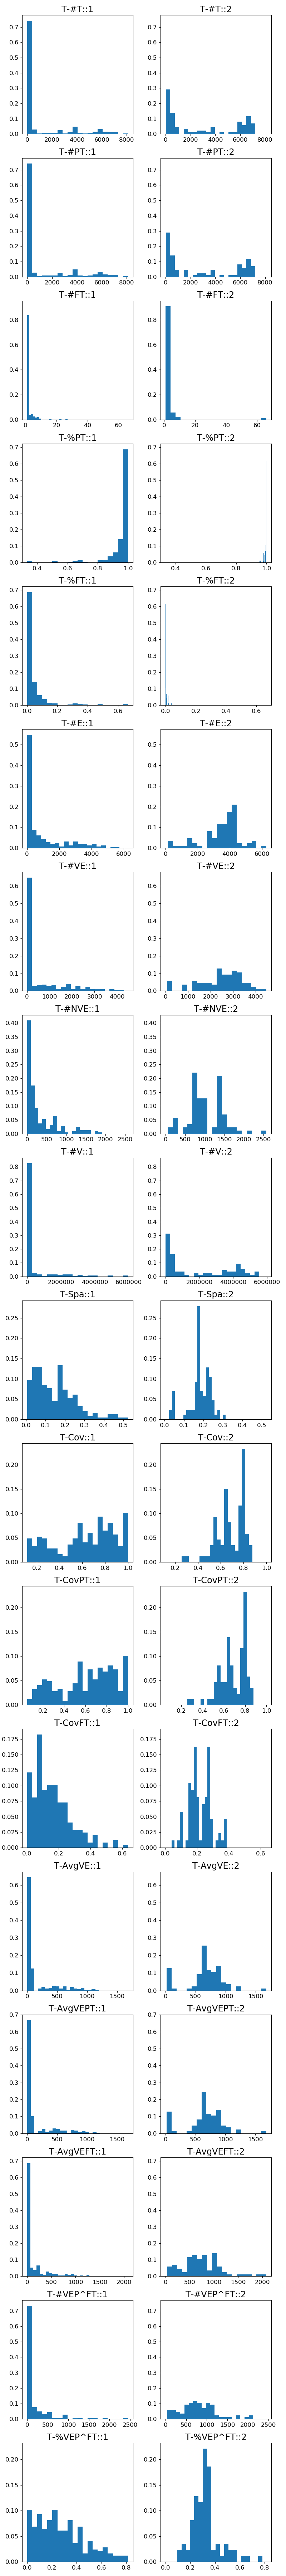

In [50]:
plot_hists_groups(data.filter(like='T-'))

# Bug Metrics

## Box Plots

<IPython.core.display.Javascript object>


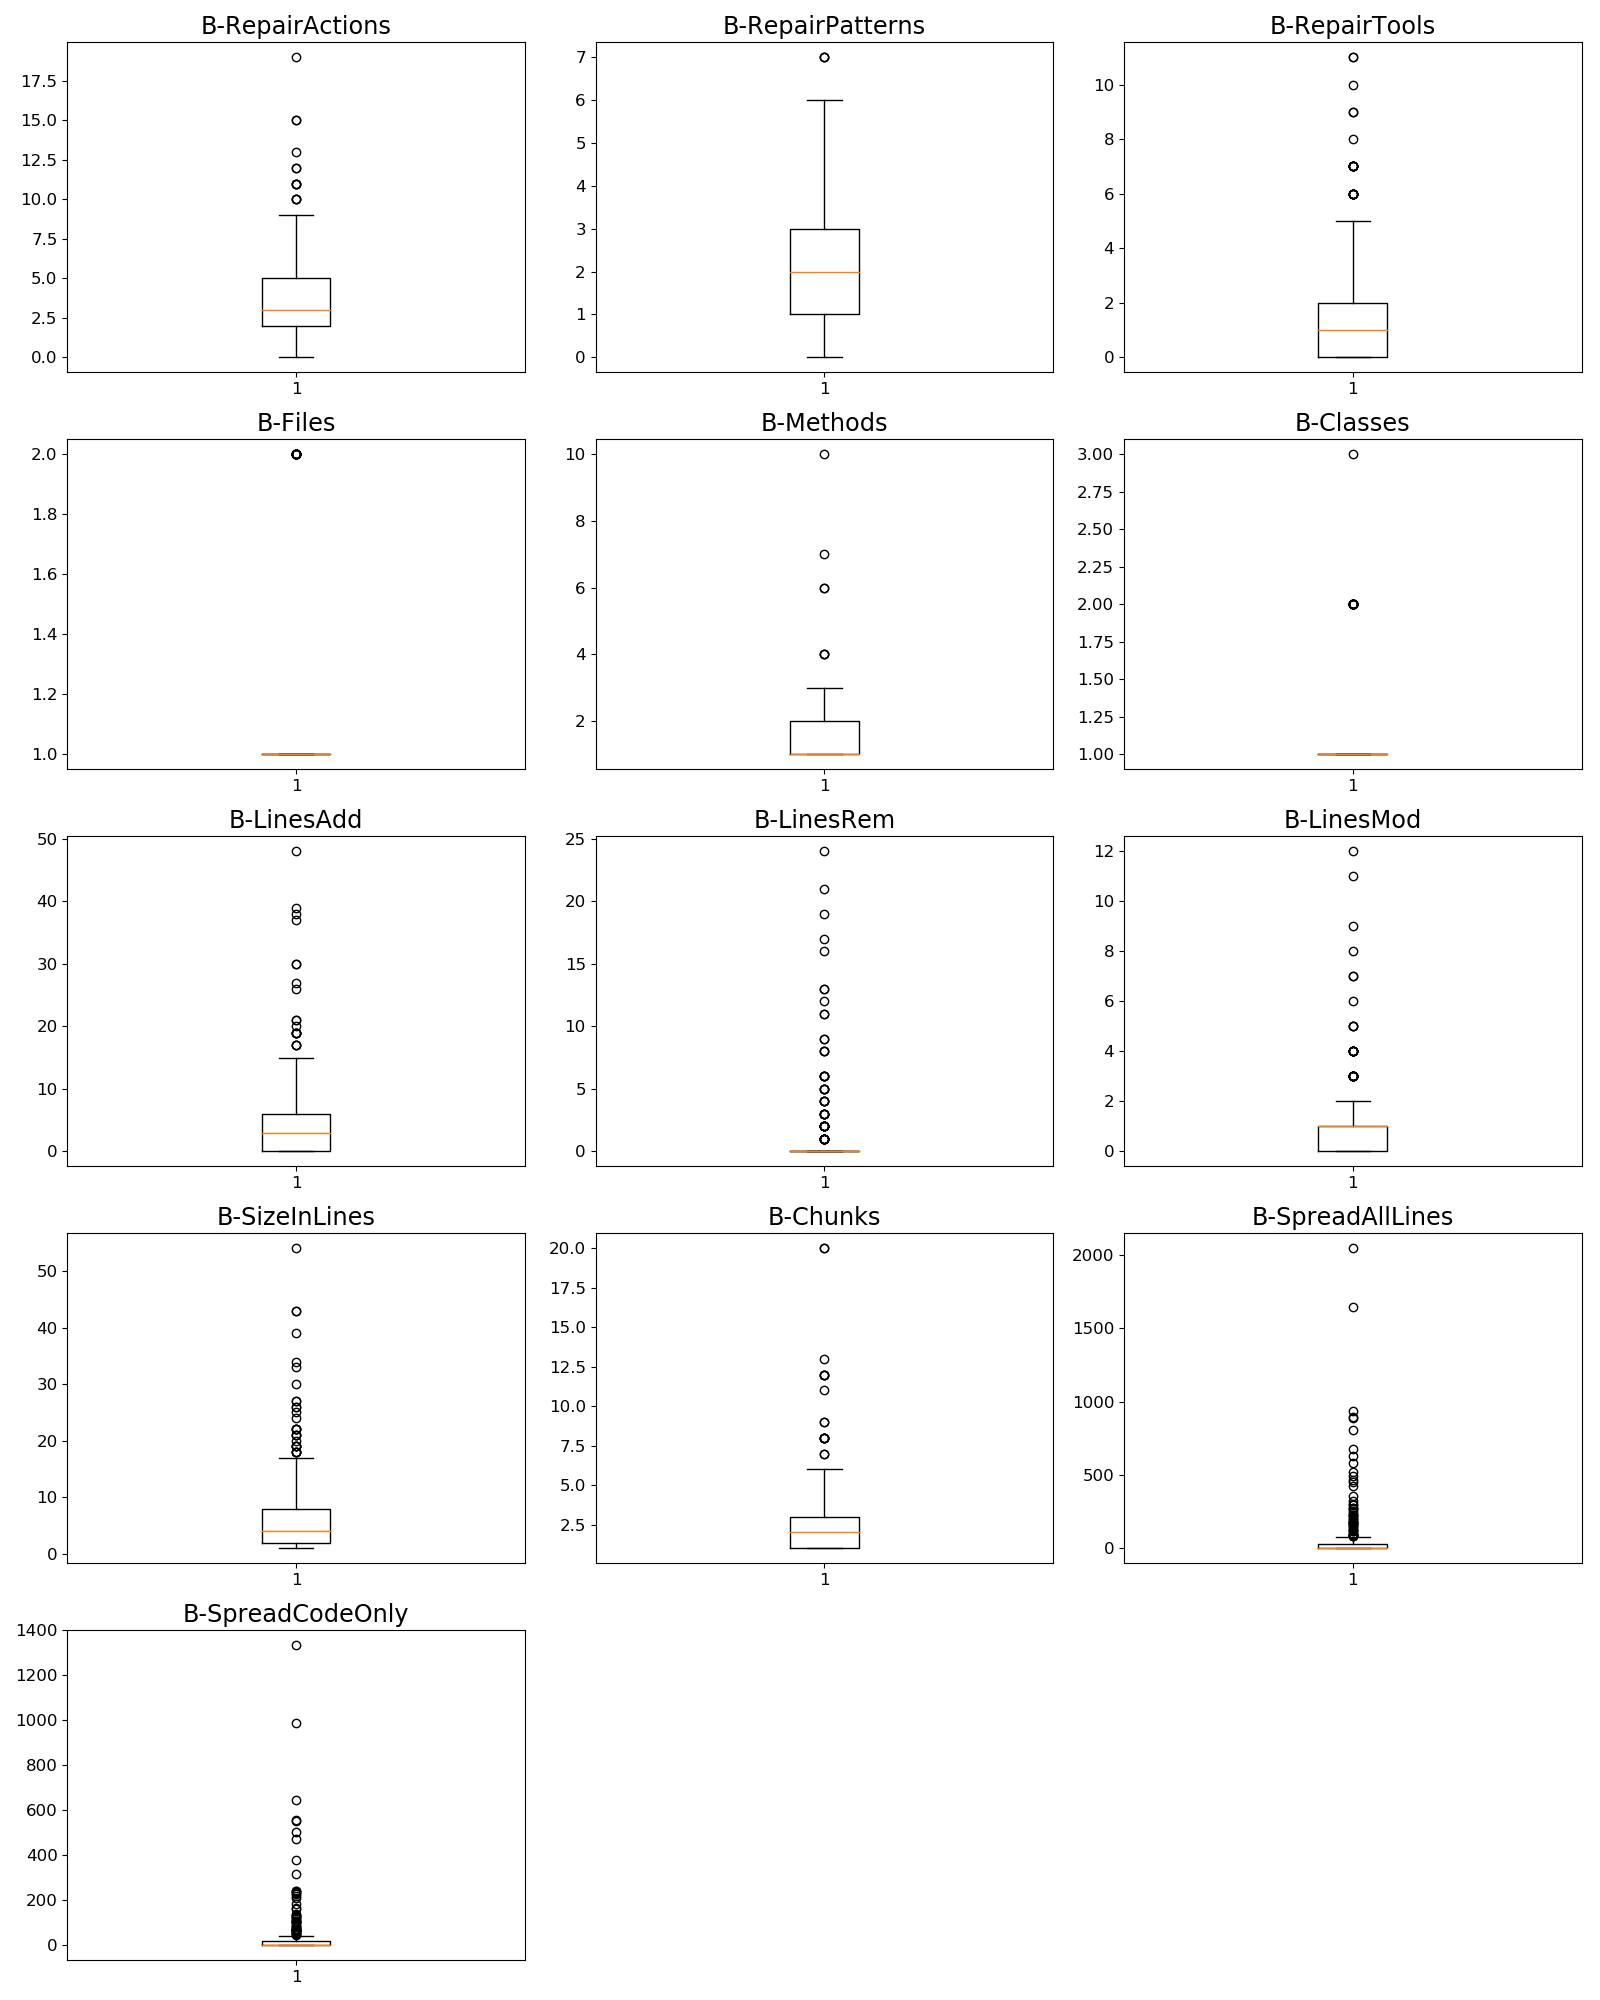

In [52]:
plot_boxes(data.filter(like='B-'))

## Histograms (normalized)

<IPython.core.display.Javascript object>


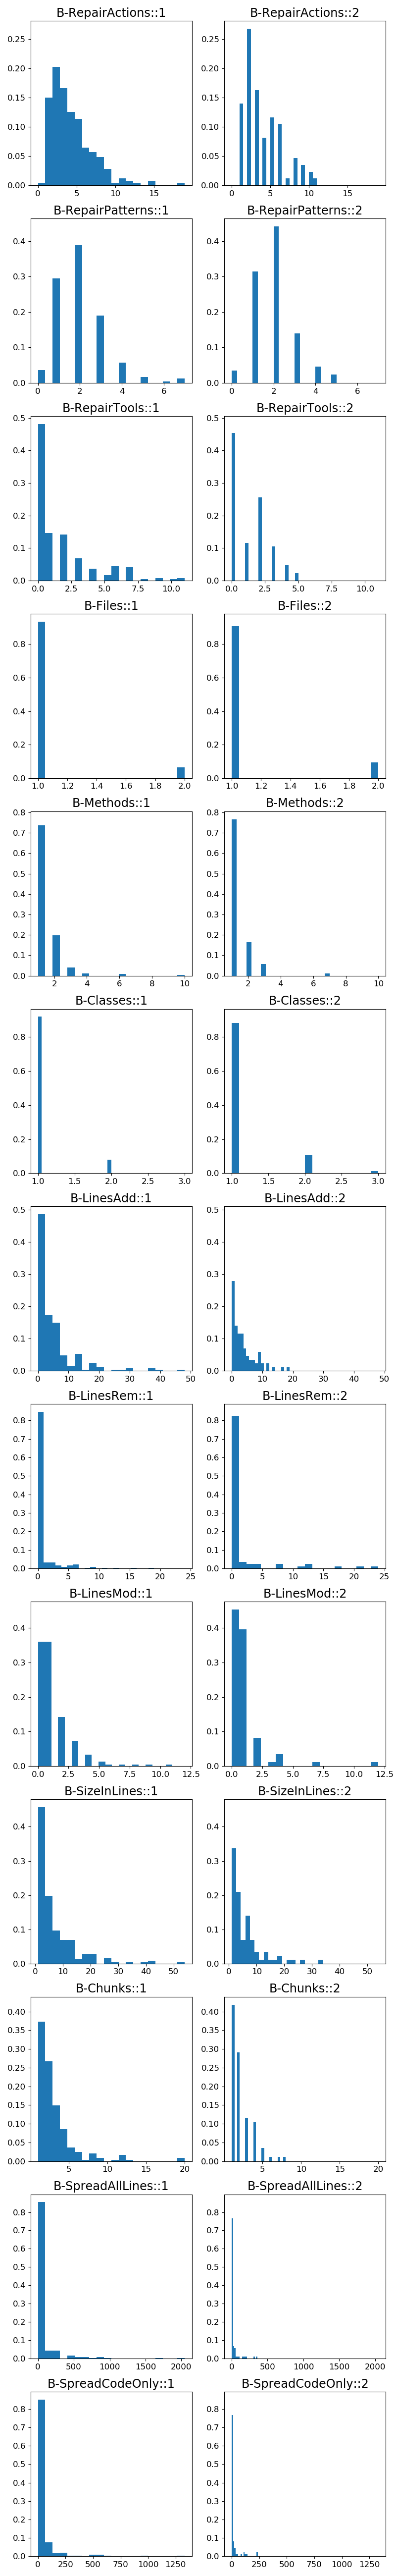

In [53]:
plot_hists_groups(data.filter(like='B-'))